In [7]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [2]:
# CSVデータの読み込み
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

In [3]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
# データの内容確認
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6158,-118.2,34.2,31.0,3812.0,595.0,1645.0,591.0,7.6,380.1
13231,-121.9,37.0,21.0,3707.0,751.0,1420.0,608.0,4.4,295.2
4287,-118.0,34.1,32.0,1613.0,361.0,1283.0,404.0,3.2,181.7
11316,-121.2,38.7,37.0,1252.0,267.0,686.0,256.0,3.0,121.9
8642,-118.5,34.2,32.0,2593.0,566.0,1596.0,547.0,4.0,199.2
...,...,...,...,...,...,...,...,...,...
12611,-121.7,36.7,37.0,641.0,129.0,458.0,142.0,3.3,252.6
10902,-120.8,35.3,17.0,4197.0,802.0,1656.0,732.0,3.5,183.9
13902,-122.0,37.9,23.0,3318.0,408.0,1124.0,393.0,6.6,358.8
2587,-117.7,33.5,10.0,3484.0,582.0,1469.0,556.0,5.4,402.2


In [4]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [8]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [12]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

Saving figure attribute_histogram_plots


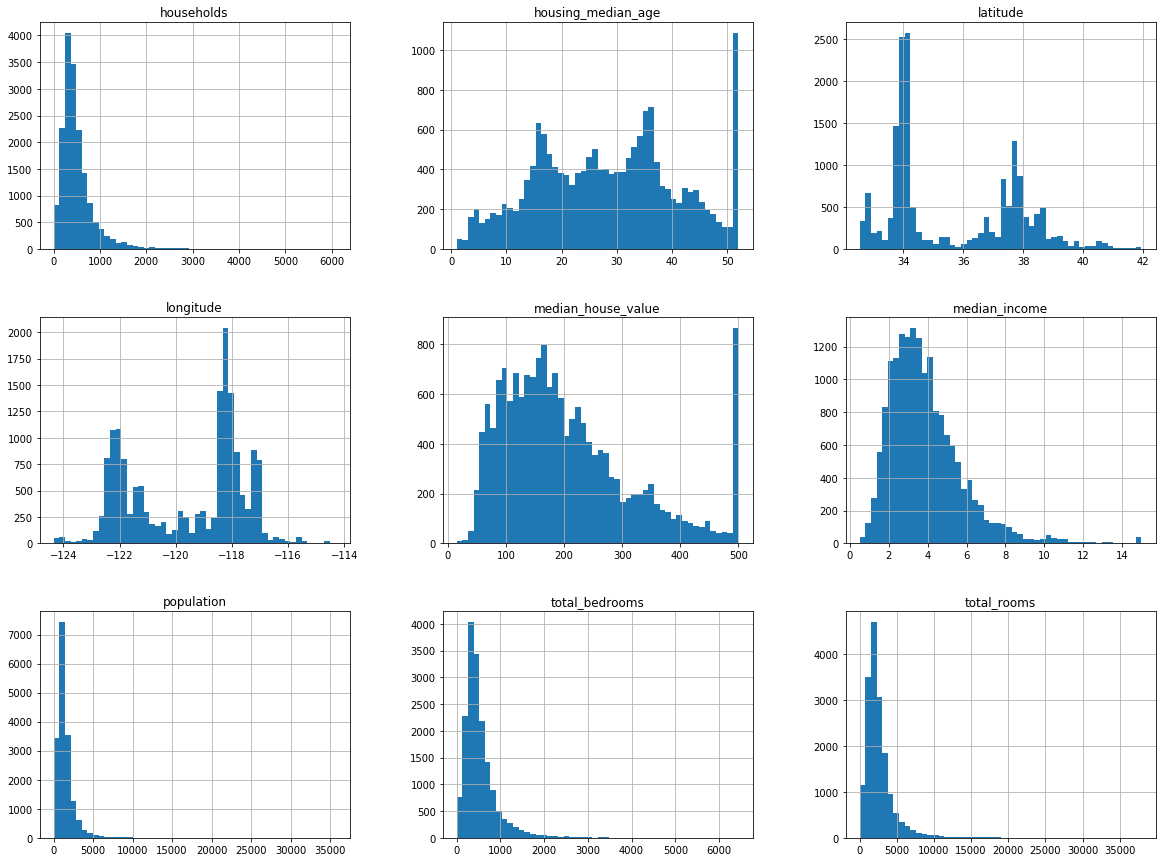

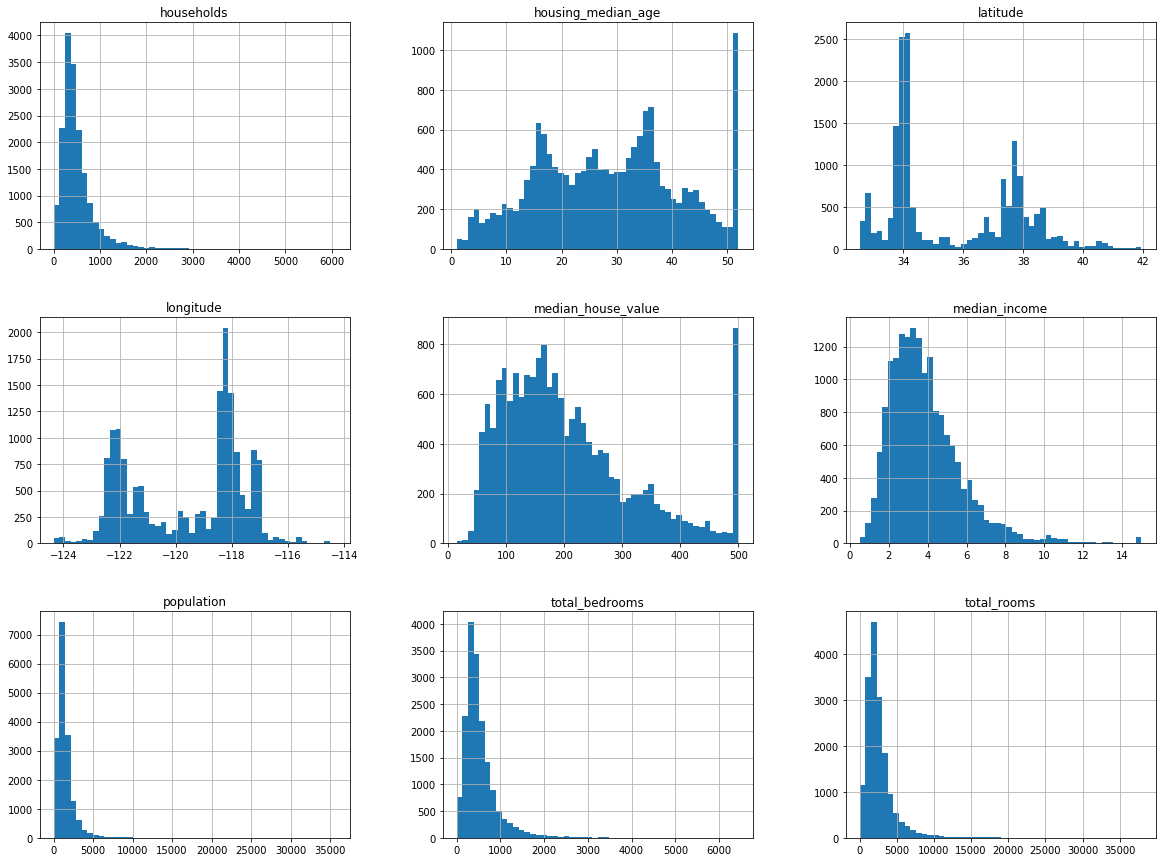

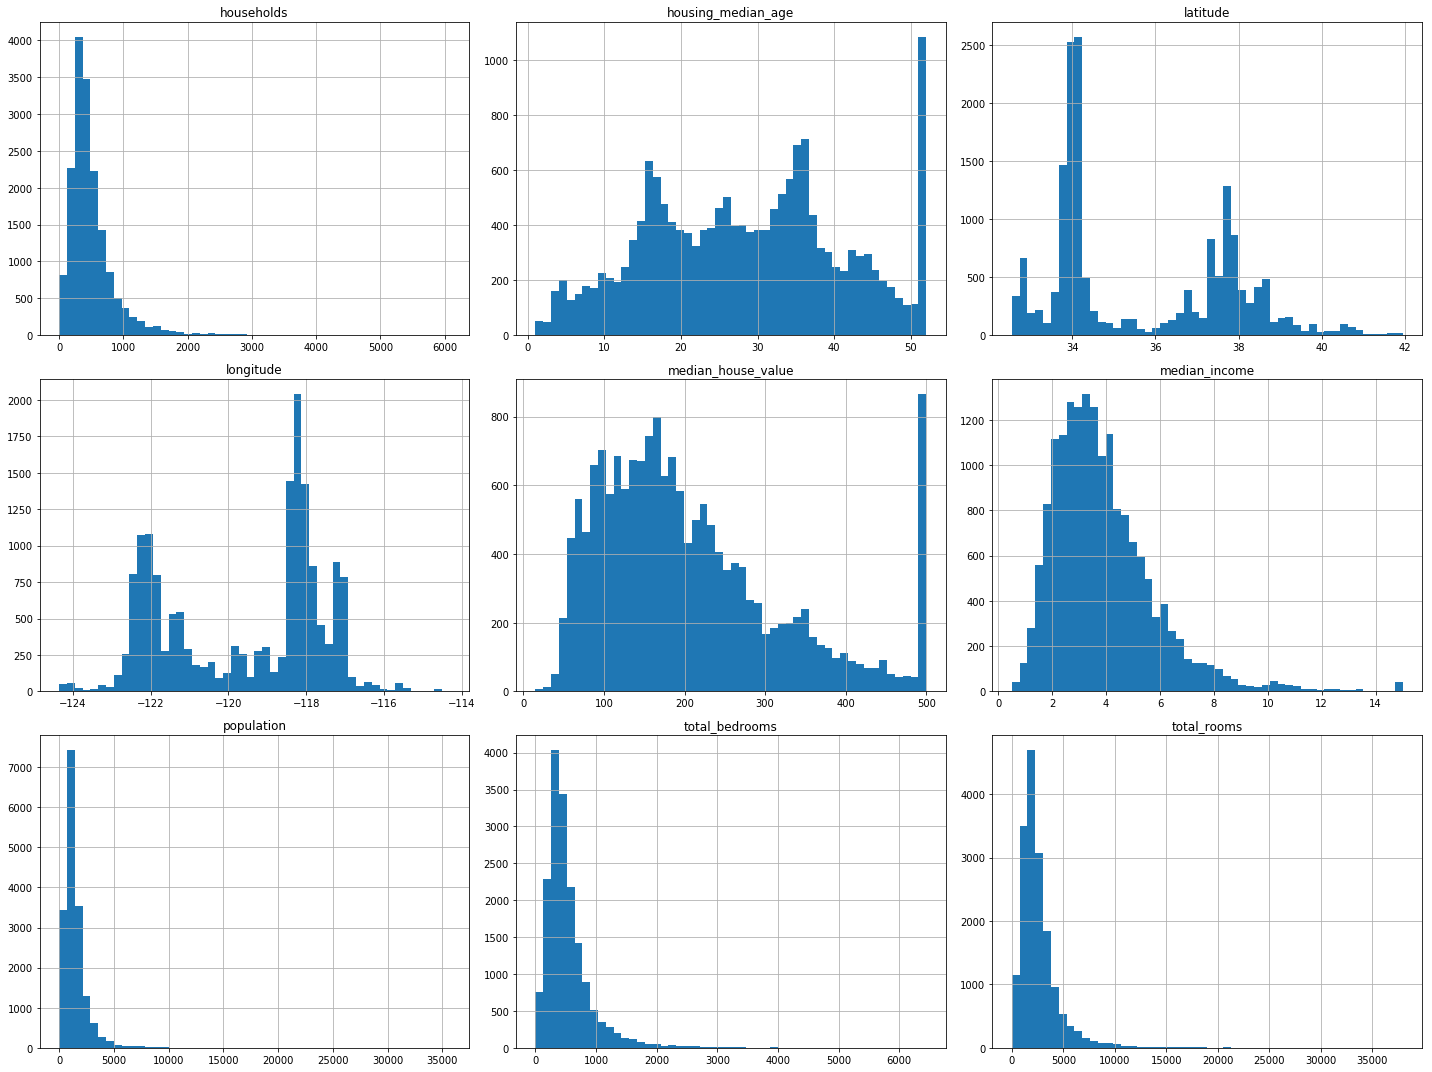

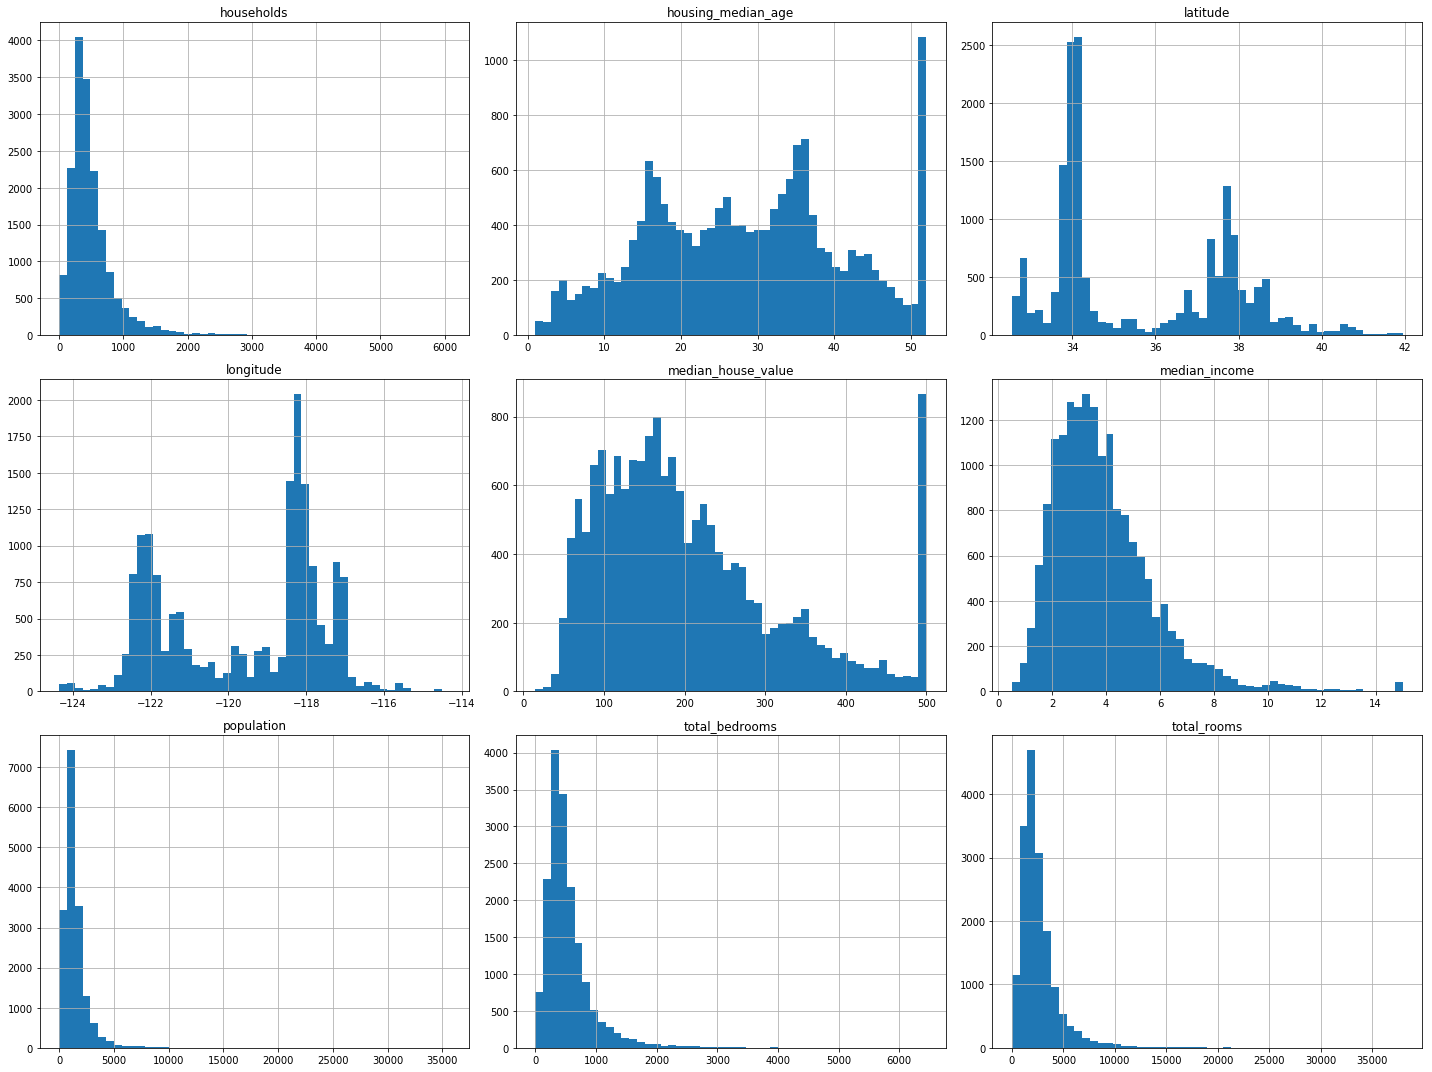

In [13]:
california_housing_dataframe.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure scatter_matrix_plot


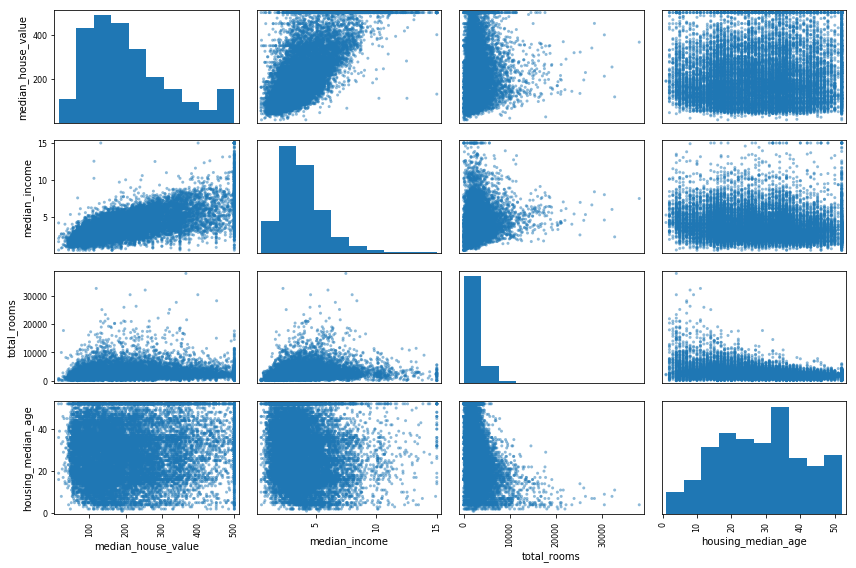

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(california_housing_dataframe[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")
plt.show()